In [1]:
import train
import process_data
import eval
import matplotlib.pyplot as plt

In [2]:
asset = ["GC=F", "^GSPC"]
start = "2014-01-01"
end = "2024-12-01"
target_range = 2
range_input = 30

data = process_data.prepar_data(asset, start, end, target_range)
data_scale = process_data.sklearn_scaled(data)
x_train, y_train, x_test, y_test, test_close = process_data.split_data(
    data=data_scale,
    train_ratio=0.5,
    close=data["Close"]["GC=F"].to_numpy(),
    data_range=range_input,
)

[*********************100%***********************]  2 of 2 completed


In [4]:
model, history = train.train_model(b=100, e=50, n=200, x_train=x_train, y_train=y_train)

Epoch 1/50


d:\co_op\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1008
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0029
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0025
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0023
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0022
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022
Epoch 16/50
14/

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


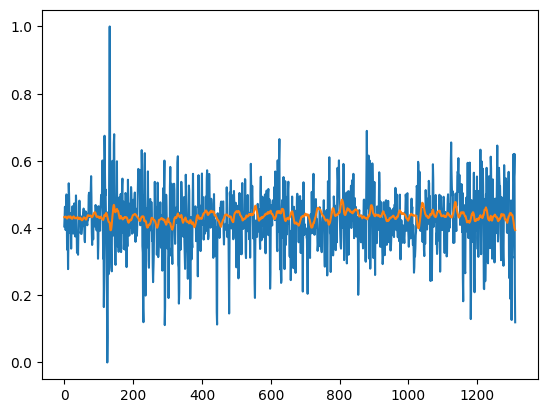

In [5]:
eval.backtest(model, x_test, y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


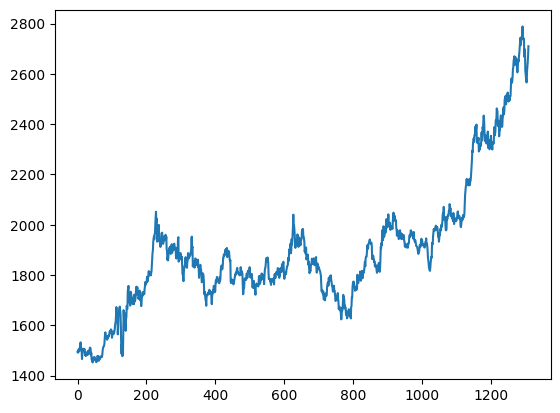

In [8]:
predict = model.predict(x_test)

# plt.plot(y_train)
plt.plot(test_close)
plt.show()

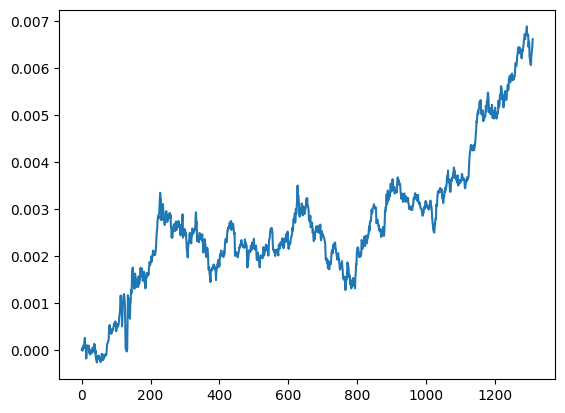

In [ ]:
import numpy as np
close_price = data["Close"]["GC=F"]
profit = [0]
for i in range(len(test_close)-1):
    tmp = (test_close[i+1] - test_close[i]) / test_close[i] * 100
    # tmp = (test_close[i]/100) * (abs(test_close[i]-test_close[i+1]))
    
    profit.append(profit[-1] + tmp)
plt.plot(profit)
plt.show()